# Power law fitting



## Initialise code

First, we need to load some packages and functions. This will enable us to reading data from csv files, make power law fits and to plot any results.

In [1]:
from pyrootmemo.io import read_csv_roots
from pyrootmemo.fit import Powerlaw
import matplotlib.pyplot as plt

## Load data

There are three sources of data available:

* tensile test data for *Lolium perenne* (Talveg dataset)
* tensile test data for *Onobrychis viciifolia* (Talveg dataset)
* tensiletest data for Maize (Meijer et al (2024, see https://doi.org/10.1007/s11104-024-06507-y))

By default, this notebook loads the Maize data but you can easily change this out by changing the path to the relevant data file.

Alternatively, you can read in your own data by placing a comma seperated .csv file in the project folder and adjusting the path below. Your csv file must have (at least) two columns, one for diameter and one for tensile strength measurements. All column should be named in the .csv header row using the following convention:

* 'diameter_unit'
* 'tensile_strength_unit'

where 'unit' is the measurement unit in your data. For example, the default data had headers 'diameter_mm' and 'tensile_strength_MPa' for the columns containing diameter (measured in millimetres) and tensile strength values (measured in megapascals).

In [ ]:
# load tensile strength data from csv
data = read_csv_roots('data/tensile_maize_meijer2024.csv')
# data = read_csv_roots('data/tensile_lolium_perenne_talveg.csv')
# data = read_csv_roots('data/tensile_onobrychis_viciifolia_talveg.csv')


Your data is loaded into the object `data`. This object has attributes `diameter` and `tensile_strength` (and perhaps others too if you use your own data) that contain each lists of data. These data keeps its measurement units with it, so there is never any confusion as to what it units are! 

We can access data in the object by:


In [3]:
# show data to screen
print(data.diameter)

[0.768 0.979 0.353 0.316 0.635 0.868 0.355 0.37 0.245 0.322 0.127 0.245 0.863 0.809 0.082 0.131 0.5 0.435 0.187 0.2] millimeter


In [4]:
# show only values (with no units)
print(data.diameter.magnitude)

[0.768 0.979 0.353 0.316 0.635 0.868 0.355 0.37  0.245 0.322 0.127 0.245
 0.863 0.809 0.082 0.131 0.5   0.435 0.187 0.2  ]


In [5]:
# show the unit of measurement
print(data.diameter.units)

millimeter


We can easily convert between different unit types

In [6]:
# show diameter values in inches
print(data.diameter.to('inch'))

[0.030236220472440952 0.03854330708661418 0.013897637795275593 0.012440944881889767 0.025000000000000005 0.0341732283464567 0.013976377952755907 0.01456692913385827 0.009645669291338584 0.012677165354330711 0.005000000000000001 0.009645669291338584 0.03397637795275591 0.03185039370078741 0.003228346456692914 0.005157480314960631 0.019685039370078743 0.017125984251968505 0.00736220472440945 0.007874015748031498] inch


Let's plot a histogram showing the distribution of tested diameters.

Text(0, 0.5, 'Number of roots [-]')

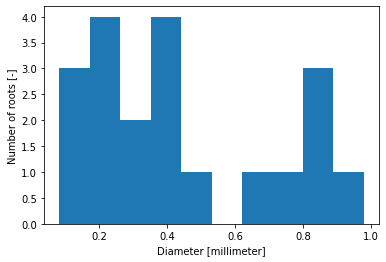

In [7]:
plt.hist(data.diameter.magnitude)
plt.xlabel('Diameter [' + str(data.diameter.units) + ']')
plt.ylabel('Number of roots [-]')

Let's also have a look at all diameter and tensile strength measurements in a scatter plot, so we know what we are trying to fit.

Text(0, 0.5, 'Tensile strength [megapascal]')

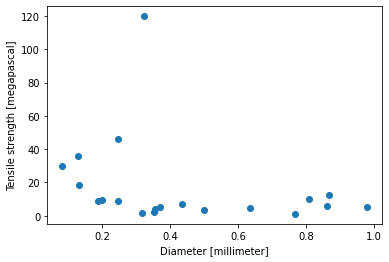

In [8]:
plt.scatter(data.diameter.magnitude, data.tensile_strength.magnitude)
plt.xlabel('Diameter [' + str(data.diameter.units) + ']')
plt.ylabel('Tensile strength [' + str(data.tensile_strength.units) + ']')

## Fit

Let's now generate some power law fits for your data.

There are different fitting models to choose from in `pyrootmemo`. These models are further described in Meijer (2025), see https://doi.org/10.1007/s11104-024-07007-9. Currently, you can choose from:

| pyrootmemo name | distribution | scaling intra-diameter variation | notes
| --- | --- | --- | --- 
| `gamma` | gamma | scales with mean | |
| `gumbel` | gumbel | scales with mean | |
| `logistic` | logistic | scales with mean | |
| `lognormal` | lognormal | scales with mean | |
| `lognormal_uncorrected` | lognormal | scales with mean | not corrected for geometric mean |
| `normal` | normal | constant with diameter (in terms of strength) | same as least-squared regression of diameter--strength data |
| `normal_force` | normal | constant with diameter (in terms of force) | same as to least-squared regression of diameter--force at failure data |
| `normal_scaled` | normal | scales with mean | |
| `normal_freesd` | normal | varies with diameter according to seperate power law | |
| `uniform` | uniform | scales with mean | |
| `weibull` | weibull | scales with mean | |

We suggest you start with `normal`. This is the (conventional) least-squared regression method. Then try some of the other fits to see how the fit changes. 

Multiplier: 9.48804162371114 megapascal
Exponent: -0.5082621523255053
Kolmogorov-Smirnov distance: 0.3186391035130772
Loglikelihood: -93.13114671067692


(<Figure size 432x288 with 1 Axes>,
 <Axes: xlabel='Diameter [mm]', ylabel='Tensile strength [MPa]'>)

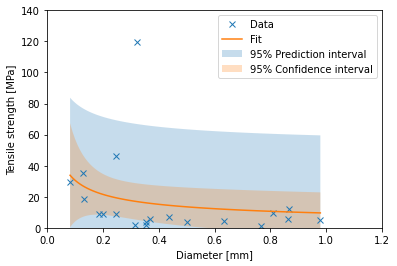

In [14]:
# define fit type
fit_model = 'normal'

# generate tensile strength fit object
fit = Powerlaw(
    data.diameter, 
    data.tensile_strength, 
    model = fit_model
    )

# show best-fitting power law parameters
print('Multiplier:', fit.multiplier)
print('Exponent:', fit.exponent)
# show Kolmogorov-Smirnov distance (smaller values indicate chosen distribution is more suitable)
print('Kolmogorov-Smirnov distance:', fit.ks_distance())
# show loglikelihood result (larger values are a measure for better fits)
print('Loglikelihood:', fit.loglikelihood())

# plot results (plus confidence and/or prediction intervals)
fit.plot(
    confidence = True, 
    prediction = True, 
    confidence_level = 0.95,
    prediction_level = 0.95
    )

The confidence interval shows you the band in which the **fit** will be, with 95% certainty. Thinner bands are better.

The prediction interval shows the band in which any **new data** is predicted to be, based on the current fit, with 95% probability. This interval should match the measured data as closely as possible for any diameter.

## Explore!

* What fitting model gives the most reliable results for your data?
* Try with a different set of data. Is the 'best' model different?